In [65]:
from pyDOE2 import bbdesign
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

#### Box-Behnken

In [66]:
# Define factor levels
three_level_factors = {
    "A": [-1, 0, 1], # WingLength
    "B": [-1, 0, 1], # BodyLength
    "C": [-1, 0, 1] # BodyWidth
}

two_level_factors = {
    "D": -1,  # -1: No PaperClip
    "E":-1       # -1: No Tape
}

In [67]:
bbd_matrix = bbdesign(len(three_level_factors), center=3)

In [68]:
bbd_df = pd.DataFrame(bbd_matrix, columns=three_level_factors.keys())

bbd_df

,A,B,C
0,-1.0,-1.0,0.0
1,1.0,-1.0,0.0
2,-1.0,1.0,0.0
3,1.0,1.0,0.0
4,-1.0,0.0,-1.0
5,1.0,0.0,-1.0
6,-1.0,0.0,1.0
7,1.0,0.0,1.0
8,0.0,-1.0,-1.0
9,0.0,1.0,-1.0


In [69]:
#bbd_df = bbd_df.assign(**two_level_factors)
bbd_df

,A,B,C
0,-1.0,-1.0,0.0
1,1.0,-1.0,0.0
2,-1.0,1.0,0.0
3,1.0,1.0,0.0
4,-1.0,0.0,-1.0
5,1.0,0.0,-1.0
6,-1.0,0.0,1.0
7,1.0,0.0,1.0
8,0.0,-1.0,-1.0
9,0.0,1.0,-1.0


In [70]:
print(bbd_df.corr())

              A             B             C
A  1.000000e+00 -2.775558e-17 -1.001484e-33
B -2.775558e-17  1.000000e+00  0.000000e+00
C -1.001484e-33  0.000000e+00  1.000000e+00


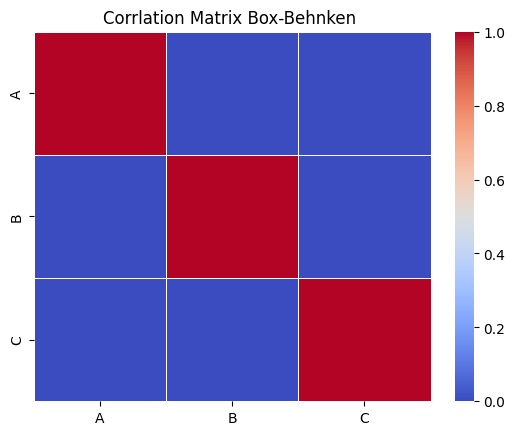

In [71]:
sns.heatmap(bbd_df.corr(), annot=False, cmap="coolwarm",  linewidths=0.5)
plt.title("Corrlation Matrix Box-Behnken ")
plt.show()

In [72]:
actual_values = {
    "A": { -1: 6.5, 0: 8, 1: 9.5 },
    "B": { -1: 6.5, 0: 8, 1: 9.5 },
    "C": { -1: 4, 0: 5, 1: 6 }
}

for col in three_level_factors:
    bbd_df[col] = bbd_df[col].map(actual_values[col])

print(bbd_df)

      A    B  C
0   6.5  6.5  5
1   9.5  6.5  5
2   6.5  9.5  5
3   9.5  9.5  5
4   6.5  8.0  4
5   9.5  8.0  4
6   6.5  8.0  6
7   9.5  8.0  6
8   8.0  6.5  4
9   8.0  9.5  4
10  8.0  6.5  6
11  8.0  9.5  6
12  8.0  8.0  5
13  8.0  8.0  5
14  8.0  8.0  5


In [73]:
random_order = bbd_df.sample(frac = 1, random_state=123).reset_index(drop=True)
print(random_order)

      A    B  C
0   9.5  8.0  6
1   8.0  6.5  6
2   6.5  8.0  4
3   6.5  6.5  5
4   9.5  8.0  4
5   8.0  9.5  4
6   8.0  6.5  4
7   8.0  9.5  6
8   9.5  9.5  5
9   9.5  6.5  5
10  6.5  8.0  6
11  8.0  8.0  5
12  6.5  9.5  5
13  8.0  8.0  5
14  8.0  8.0  5
